In [287]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import math
# Import the JY_Toolkit that complete by my hands
import os,sys
parentdir = os.path.dirname(os.path.abspath('.'))
temp_path = os.path.join(parentdir,'JY_Toolkit')
sys.path.insert(0,temp_path)
import JY_Toolkit



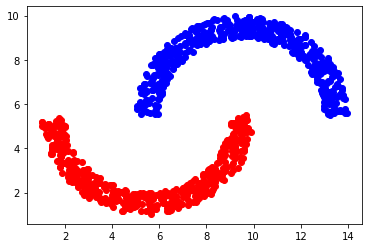

In [288]:
JY_Toolkit.Jy_makeDataset.random_state(5228)

X,y = JY_Toolkit.Jy_makeDataset.draw_HalfMoon(n_sample=1000,ver_distance=0,slope=0,negative_val=0)

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
# X
p_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == 1]
p_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == 1]
n_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == 0]
n_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == 0]

plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plt.show()

## 训练集测试集分离

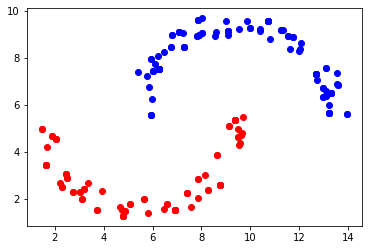

In [289]:
X_train,X_valid,y_train,y_valid = JY_Toolkit.Jy_dataSetProcess.Jy_train_test_split(X,y)

p_point_x1 = [ X_valid[i,0] for i in range(len(X_valid)) if y_valid[i] == 1]
p_point_x2 = [ X_valid[i,1] for i in range(len(X_valid)) if y_valid[i] == 1]
n_point_x1 = [ X_valid[i,0] for i in range(len(X_valid)) if y_valid[i] == 0]
n_point_x2 = [ X_valid[i,1] for i in range(len(X_valid)) if y_valid[i] == 0]

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plt.show()


In [290]:

class LogisticRegression(object):
    def __init__(self,
                w_dim,
                *,
                l_rate = 0.001,
                epoch = 10):
        self.w = np.ones(w_dim + 1, dtype=np.float32)
        self.l_rate = l_rate
        self.epoch = epoch
        self.lost = []
    
    def set_l_rate(self,new_learning_rate):
        self.l_rate = new_learning_rate
    
    def logisticFuncition(self,input,theta):
        g = np.dot(input,theta)
        return 1/(1 + math.exp(-1 * g))

    def predict_one(self,x):
        g = self.logisticFuncition(x, self.w)
        if g >= 0.5:
            return 1
        else:
            return 0

    def fit(self,
            X_train,
            y_train):
        
        temp = np.ones(len(X_train))
        X_train = np.column_stack((X_train, temp))  # up X dimension
        del temp                # Recycle temp

        self.lost.clear()
        lost_temp = 0

        for iter_ in range(self.epoch):
            for i in range(len(X_train)):
                x = X_train[i]
                y = y_train[i]
                # 随机梯度下降
                temp_res = self.predict_one(x)
                # print(f'temp_res{temp_res}')
                if temp_res != y:
                    lost_temp += 1
                self.w  += self.l_rate * ( y - self.logisticFuncition(x,self.w)) * x
        
                pass
            self.lost.append(lost_temp)
            if iter_%5 == 0:
                print('iter_:',iter_,'lost:',lost_temp,'l_rate :',self.l_rate)
                
            lost_temp = 0

        pass
    def predict(self,X_valid):
        temp = np.ones(len(X_valid))
        X_valid = np.column_stack((X_valid, temp))  # up X dimension
        del temp                # Recycle temp

        temp_res = [self.logisticFuncition(X_valid[i],self.w) for i in range(len(X_valid)) ]
        y_predict = list(map(lambda x : 1 if x >= 0.5 else 0,list(temp_res)))
        return np.array(y_predict)

    def score(self,y,label):
        accuracy = 0
        for i in range(len(y)):
            if  y[i] == label[i]:
                accuracy += 1
        return int((accuracy / len(label))*10000)/100, len(label) - accuracy
        # return accuracy / len(label), len(label) - accuracy
    pass

# LogisticRegression.logisticFuncition([2,3],[1,1])


In [291]:
if __name__ == '__main__':

    LR = LogisticRegression(X_train.shape[1],epoch=300,l_rate= 0.001)
    LR.fit(X_train, y_train)
    y_predict = LR.predict(X_valid)
    accuracy_rate, lost_count = LR.score(y_valid, y_predict)
    print(f'score:{accuracy_rate}%','test lost:',lost_count,'last lost:',LR.lost[len(LR.lost)-1])
    print(f'w:{LR.w}')
    

iter_: 0 lost: 346 l_rate : 0.001
iter_: 5 lost: 235 l_rate : 0.001
iter_: 10 lost: 189 l_rate : 0.001
iter_: 15 lost: 144 l_rate : 0.001
iter_: 20 lost: 113 l_rate : 0.001
iter_: 25 lost: 100 l_rate : 0.001
iter_: 30 lost: 88 l_rate : 0.001
iter_: 35 lost: 77 l_rate : 0.001
iter_: 40 lost: 72 l_rate : 0.001
iter_: 45 lost: 67 l_rate : 0.001
iter_: 50 lost: 60 l_rate : 0.001
iter_: 55 lost: 51 l_rate : 0.001
iter_: 60 lost: 48 l_rate : 0.001
iter_: 65 lost: 35 l_rate : 0.001
iter_: 70 lost: 28 l_rate : 0.001
iter_: 75 lost: 25 l_rate : 0.001
iter_: 80 lost: 25 l_rate : 0.001
iter_: 85 lost: 24 l_rate : 0.001
iter_: 90 lost: 24 l_rate : 0.001
iter_: 95 lost: 21 l_rate : 0.001
iter_: 100 lost: 21 l_rate : 0.001
iter_: 105 lost: 21 l_rate : 0.001
iter_: 110 lost: 21 l_rate : 0.001
iter_: 115 lost: 21 l_rate : 0.001
iter_: 120 lost: 20 l_rate : 0.001
iter_: 125 lost: 19 l_rate : 0.001
iter_: 130 lost: 18 l_rate : 0.001
iter_: 135 lost: 17 l_rate : 0.001
iter_: 140 lost: 16 l_rate : 0.001
i

-0.08860460668802261 6.0513246269935985


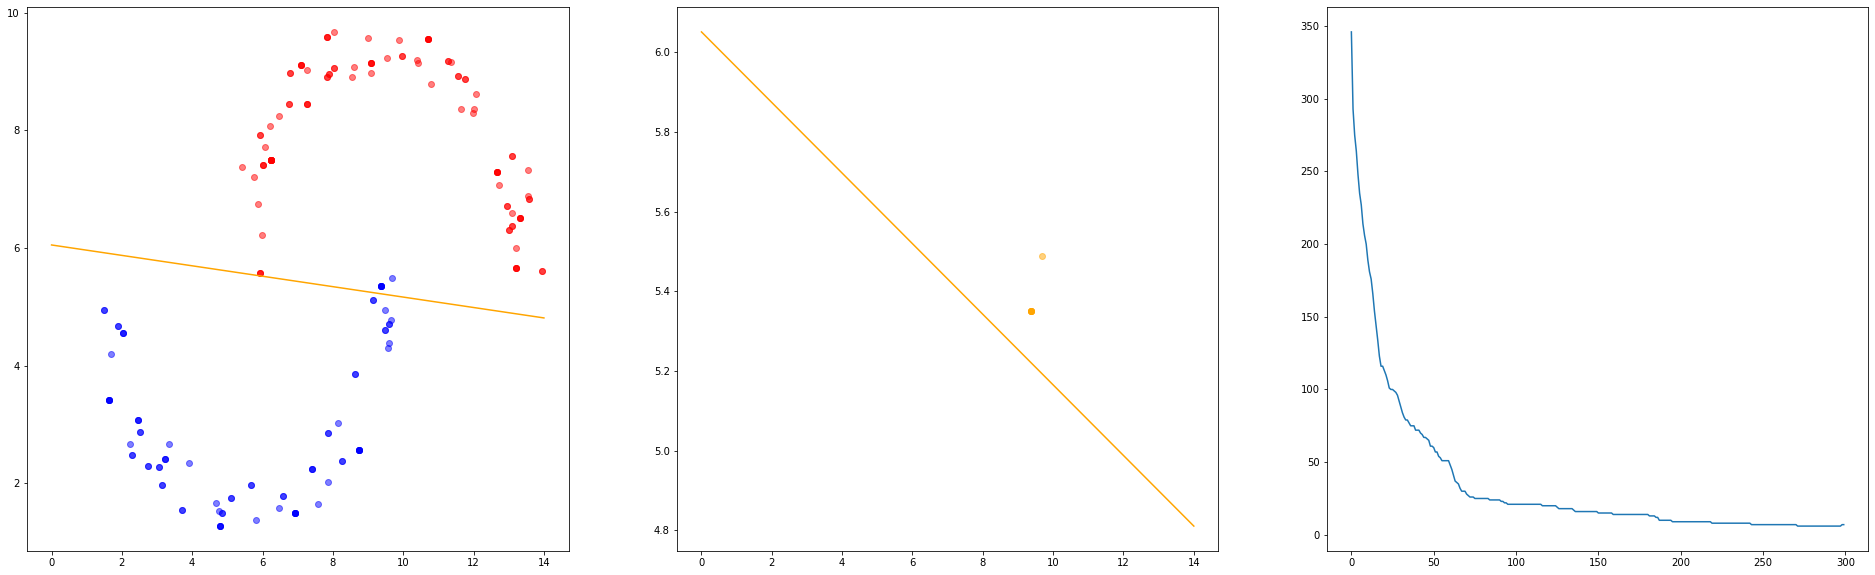

In [292]:
if __name__ == '__main__': 
    # plt
    positive_f1 = [X_valid[i][0] for i in range(len(X_valid)) if y_valid[i] == 1]
    positive_f2 = [X_valid[i][1] for i in range(len(X_valid)) if y_valid[i] == 1]
    negetive_f1 = [X_valid[i][0] for i in range(len(X_valid)) if y_valid[i] == 0]
    negetive_f2 = [X_valid[i][1] for i in range(len(X_valid)) if y_valid[i] == 0]

    mistake_f1_pre = [X_valid[i][0] for i in range(len(X_valid)) if y_predict[i] != y_valid[i]]
    mistake_f2_pre = [X_valid[i][1] for i in range(len(X_valid)) if y_predict[i] != y_valid[i]]


    fig = plt.figure(num=1,figsize=(33,10))
    ax1 = fig.add_subplot(131)

    ax1.scatter(positive_f1,positive_f2,c = 'red',alpha=0.5)
    ax1.scatter(negetive_f1,negetive_f2,c = 'blue',alpha=0.5)

    line_x = np.linspace(0,14,100)
    # line_x = np.linspace(-3,3,100)

    line_w = -1*(LR.w[0]/LR.w[1])
    line_b = -1*(float(LR.w[2])/LR.w[1])

    line_y = list(map(lambda x : x*line_w + line_b ,line_x))

    ax1.plot(line_x,line_y,c = 'orange')

    ax2 = fig.add_subplot(132)


    ax2.scatter(mistake_f1_pre,mistake_f2_pre,c = 'orange',alpha=0.5)
    ax2.plot(line_x,line_y,c = 'orange')

    ax3 = fig.add_subplot(133)
    ax3.plot(range(len(LR.lost)),LR.lost)

    print(line_w,line_b)

    plt.show()
